# Data Science & Business Analytics

# TASK 1: Prediction using Supervised ML

In this task we will predict percentage of marks that a student is expected to score based on the number of hours they have studied. It is a simple Linear Regression task .

### The following are the steps to be performed:
    1) Exploratory Data Analysis
    2) Data Prepartion
    3) ML Model
    4) Evaluation of Model
    
    Dataset URL: http://bit.ly/w-data

# 1. Exploratory Data Analysis
Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [4]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# getting the shape of data set
data.shape

(25, 2)

In [7]:
# getting the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# getting the attributes
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
# getting the datatypes 
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
#getting the statistical values
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#function to describe the count, mean and percentile, also the median of the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [12]:
# checking the null values if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
# checking the duplicate values if any
data.duplicated().sum()

0

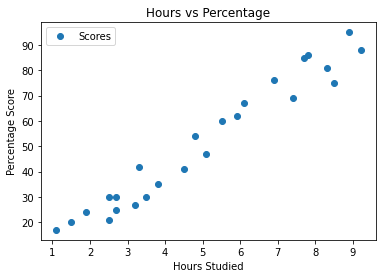

In [14]:
# line plot
data.plot(x = 'Hours', y = 'Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show('block=false')

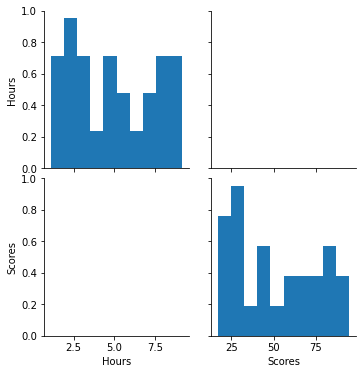

In [15]:
# scatter representation of hours and scores using a pairplot
sns.pairplot(data , kind="hist")

# joint plot
sns.jointplot(data = data, x = 'Hours', y = 'Scores', kind = 'reg', color = 'red')

# 2. Data Preperation
Split Dataset for training and testing

In [17]:
X = data.iloc[:, :-1].values  #X(Attribute) containing Hours starting with index '0'
y = data.iloc[:, 1].values    #y(Lables) containing Scores starting with indes '1'

print('Data prepared Successfully')

Data prepared Successfully


In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# 3. ML Model/Algorithm
In this step the algorithm is trained and the predictions are made.

In [20]:
#the Linear Regression Model is trained
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# intercept
print("Intercept : ",regressor.intercept_)

Intercept :  2.512129298320083


In [22]:
# coefficient
print("Coefficient : ",regressor.coef_)

Coefficient :  [9.73330705]


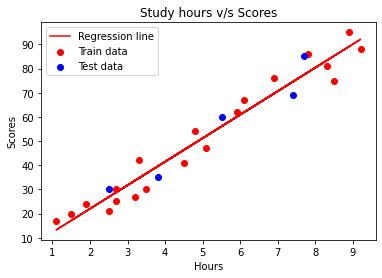

In [23]:
# plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train, label = "Train data", color = 'red')
plt.scatter(X_test, y_test, label = "Test data", color = 'blue')
plt.title("Study hours v/s Scores")
plt.plot(X, line, color = 'red', label = 'Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [24]:
# predicting the score of sutudents
y_pred = regressor.predict(X_test)
print(y_pred)

[26.84539693 77.45859361 39.4986961  74.53860149 56.04531809]


In [25]:
print(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Varience':y_test-y_pred})  
df

,Actual,Predicted,Varience
0,30,26.845397,3.154603
1,85,77.458594,7.541406
2,35,39.498696,-4.498696
3,69,74.538601,-5.538601
4,60,56.045318,3.954682


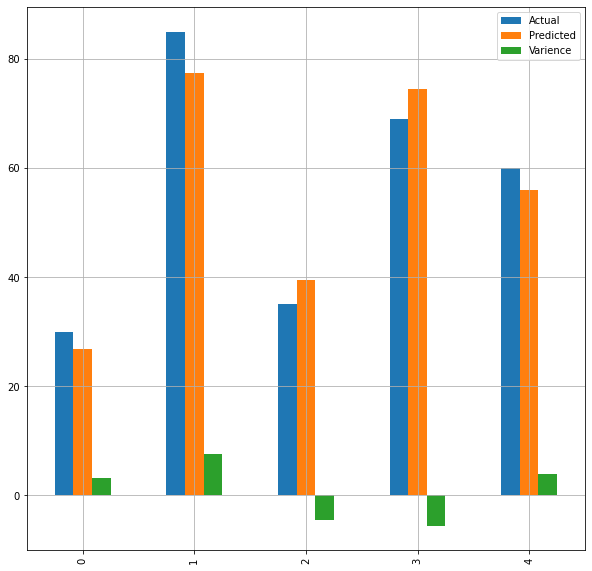

In [27]:
# plotting actual v/s predicted
df.plot(kind = 'bar', figsize = (10,10))
plt.grid()
plt.show()

In [28]:
# training accuracy and testing accuracy
print("Training Accuracy :",regressor.score(X_train,y_train))
print("Testing Accuracy :",regressor.score(X_test,y_test))

Training Accuracy : 0.954930331163377
Testing Accuracy : 0.9377551740781869


In [29]:
hours = 9.25
hr1 = np.array([hours])
hr1 = hr1.reshape(-1, 1)
own_pred = regressor.predict(hr1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.5452195402996


In [30]:
hours = float(input("Enter the no of hours = "))
hr1 = np.array([hours])
hr1 = hr1.reshape(-1, 1)
own_pred = regressor.predict(hr1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the no of hours = 9.25
No of Hours = 9.25
Predicted Score = 92.5452195402996


# 4. Evaluation of the Model
The final step is to evaluate the performance of algorithm.

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2score = round(r2_score(y_test, y_pred)*100,3)

print("Mean Absolute Error : ",MAE)
print("Mean Squared Error : ",MSE)
print("Root Mean Squared Error : ",RMSE)
print("R2score : ",r2score)

Mean Absolute Error :  4.937597792467705
Mean Squared Error :  26.675642597052235
Root Mean Squared Error :  5.164846812544612
R2score :  93.776


# Conclusion
If the student studies for 9.25 hrs/ day, the predicted score will be 92.54

List of Tasks done:-

1.Performed Exploratory Data Analysis on the dataset.

2.Prepared the data and applied the simple Linear Regression Algorithm.

3.Predicted the scores based on the Study Hours.

4.Evaluated the Algorithm.